In [3]:
from PIL import Image
import vtk
import numpy as np
import pyvista as pv
import numpy as np
from matplotlib.colors import ListedColormap

#pyvista.start_xvfb() 
pv.set_jupyter_backend('ipyvtklink')
#pv.set_jupyter_backend('panel')
pv.set_plot_theme('document')
#pv.set_jupyter_backend('static')  # Static Backends

In [4]:
trial = 'VizTrial'
frame = '000001'

ext = '.vtu'
path = './' + trial + '/PVD/'

In [17]:
def doDensityVelocity(trial, frame,ext):
    VaporVelocity = path + 'Vapor_Velocity' + frame + ext
    readVV = pv.read(VaporVelocity)
    readVV['vectors'] = readVV[readVV.array_names[0]]
    Density = path + 'R'  + frame + ext
    readR = pv.read(Density)
    #readVV.set_active_vectors('vectors')
    #pl.add_mesh(glyphs, specular=1, specular_power=15)      
    #dargs = dict(show_scalar_bar=True ) #False)
    sargs = dict(height=0.25, vertical=True, position_x=.9, position_y=.382, fmt="%.1f", font_family="arial", label_font_size=16)#title_font_size=20, ,title= '[kg/kg]')
    #glyphs = multiglyph(readVV, orient=True, scale=True, factor=.0006, tolerance=.02)    # .0002
    pl = pv.Plotter()
     #, smooth_shading=True)
    pl.add_mesh(readR, style="wireframe", opacity=.3, color="white")    
    #pl.add_mesh(readR,  scalar_bar_args=sargs,show_edges=True )
    #pl.add_mesh(glyphs, show_scalar_bar=True, color="white")  
    #pl.add_mesh(readVV.contour(), color="white", line_width=1)
    pl.view_xy()
    #pl.camera.zoom(1.2)
    #pl.window_size=[800,400]
    #pl.renderers[0].viewport(0,0,1,1)
    #pl.camera.clipping_range = (0, 0)
    #pl.camera.reset_clipping_range()
    screenshotname = './' + trial +'/'+ "Density.png"
    figure = pl.screenshot(screenshotname)
    pl.show()
    
doDensityVelocity(trial, frame,ext)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)


 Adsorbed Flux


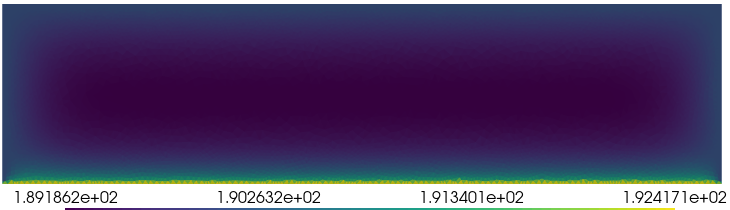


 Temperature


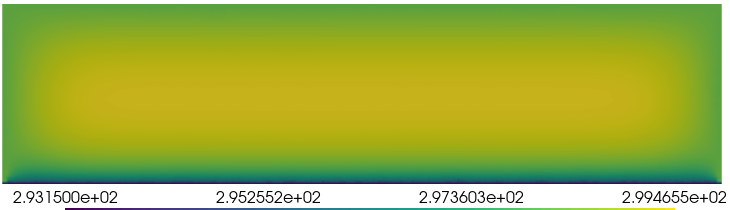


 Partial Pressure


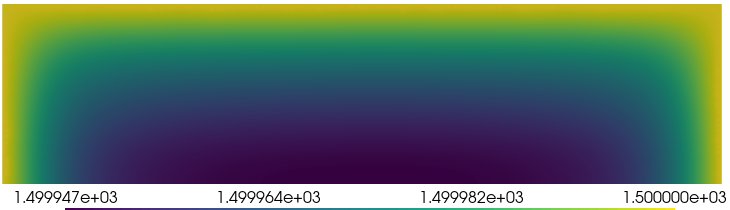


 Reynolds Number


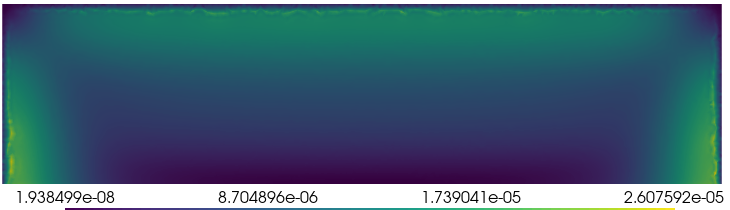


 Diffusional Time Scale


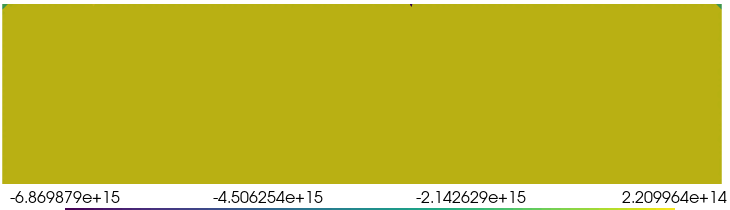


 Knudsen Number - Maxwellian Free Path


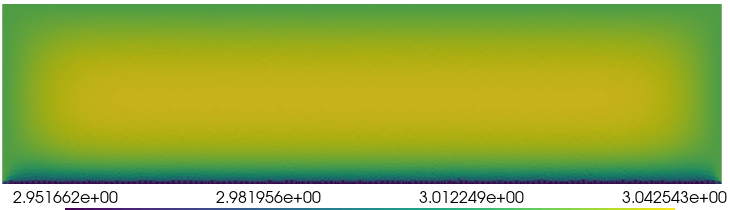


 Knudsen Number - LJ


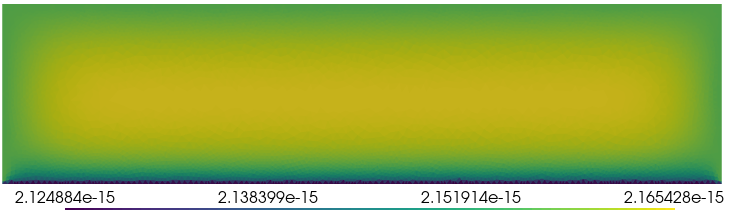


 Peclet Number


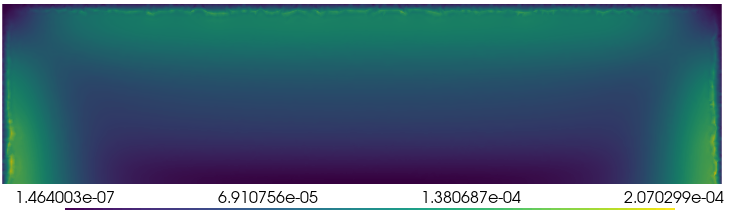


 Reynolds Number


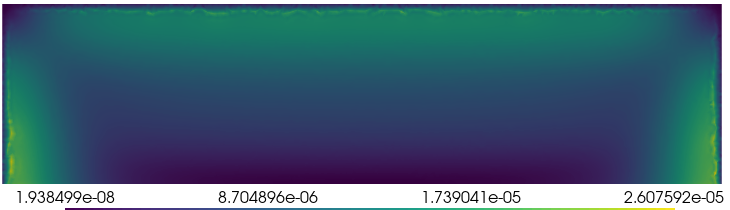


 Reynolds Number - Brinkman Length


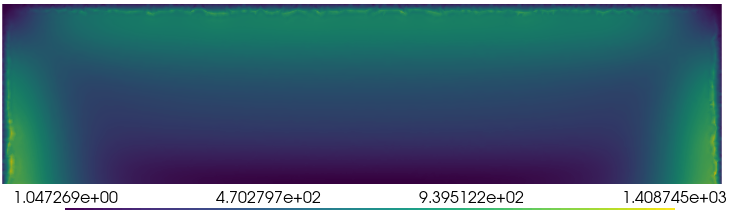


 Vapor Velocity


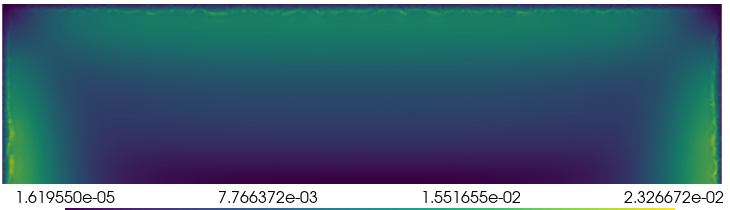


 Darcy Number


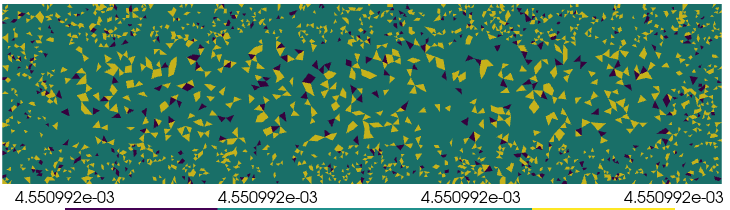


 Forcheimer Number


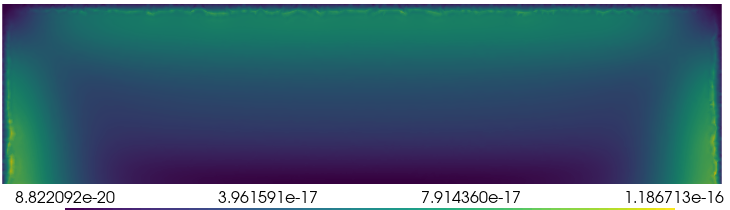


 Sigma


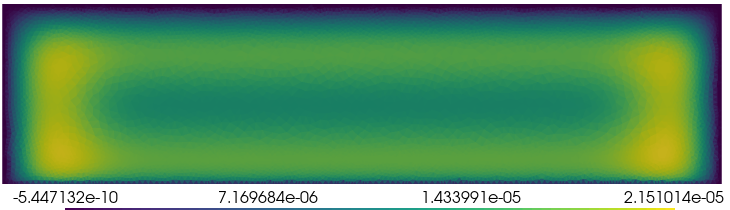


 Capillary Number


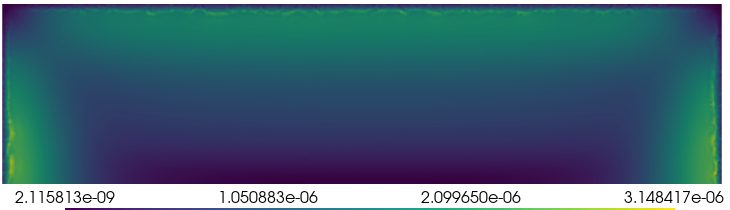


 Prandtl Number


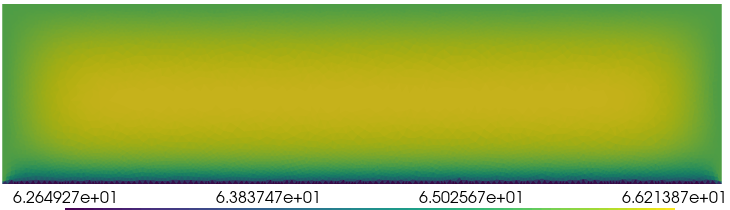


 Grashoff Number


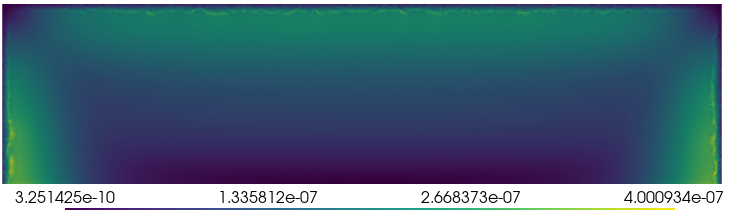


 Brinkman Friction Term


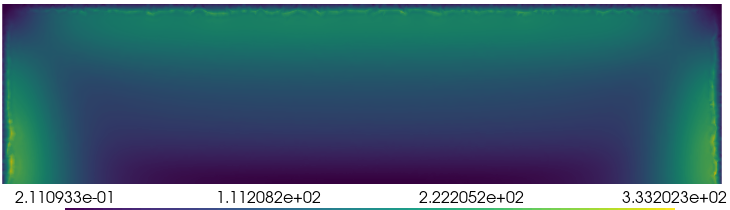


 Schmidt Number


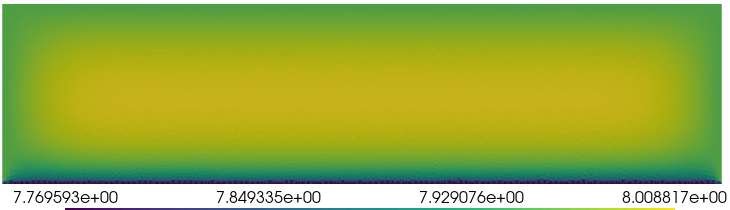

In [6]:
trial = 'VaporFixedRdamaged'
frame = '000009'

ext = '.vtu'
path = './' + trial + '/PVD/'

#doDensityVelocity(trial, frame,ext)
#doTemp(trial, frame,ext)
readR, readT, readP,readRe,readDTS,readKn_M,readKn_M,readKn_B,readPe,readReB,readVV,readDa,readFe,readSI, readCap, readPr, readGr, readBFT, readSchmidt = loadData(ext,path,trial,frame)
CoefList = [['Adsorbed Flux',readR,2], ['Temperature', readT, 0], ['Partial Pressure', readP, 0],['Reynolds Number',readRe, 6], ['Diffusional Time Scale', readDTS ,0],['Knudsen Number - Maxwellian Free Path',readKn_M,4] , ['Knudsen Number - LJ', readKn_B, 6],['Peclet Number',readPe,8],['Reynolds Number',readRe,6],['Reynolds Number - Brinkman Length',readReB,0],['Vapor Velocity', readVV , 4],[ 'Darcy Number', readDa , 6], ['Forcheimer Number',readFe,12],['Sigma',readSI,8],['Capillary Number', readCap ,8],['Prandtl Number',readPr,0],['Grashoff Number',readGr,8],['Brinkman Friction Term',readBFT,0],['Schmidt Number',readSchmidt,3]]
#CoefList = [['Reynolds Number',readRe, 6]]   
#CoefList = [['Diffusional Time Scale', readDTS ,0]]
#CoefList = [['Knudsen Number - Maxwellian Free Path',readKn_M,4]]
#CoefList = [['Knudsen Number - LJ', readKn_B, 6]]
#CoefList = [['Peclet Number',readPe,8]]
#CoefList = [['Reynolds Number',readRe,6]]
#CoefList = [['Reynolds Number - Brinkman Length',readReB,0]]
#CoefList = [['Vapor Velocity', readVV , 4]]
#CoefList = [[ 'Darcy Number', readDa , 6]]
#CoefList = [['Forcheimer Number',readFe,12]]
#CoefList = [['Sigma',readSI,8]]
#CoefList = [['Capillary Number', readCap ,8]]
#CoefList = [['Prandtl Number',readPr,0]]
#CoefList = [['Grashoff Number',readGr,8]]
#CoefList = [['Brinkman Friction Term',readBFT,0]]
#CoefList = [['Schmidt Number',readSchmidt,3]]


doSingles(trial,frame,ext,CoefList)


In [5]:
def doSingles(trial, frame,ext,CoefList):
    for i in range(0,len(CoefList)):
        CoefTitle = CoefList[i][0]
        MeshName = CoefList[i][1]
        Frac = CoefList[i][2]
        pl = pv.Plotter()
        pl.add_title(CoefTitle, font="arial", color='k',font_size=16)
        fmt = '%' + str(Frac) +'e'
        sargs = dict(n_labels=4, height=0.02, vertical=False, position_x=.21, position_y=.345, fmt=fmt, font_family="arial", label_font_size=16 ,title_font_size=20, title= ' ')
        pl.add_mesh(MeshName, scalars=MeshName.array_names[0], scalar_bar_args=sargs)
        #pl.add_mesh(readR, style="wireframe", opacity=.2, color="white")  
        pl.view_xy()
        print('\n',CoefTitle)
        fileName = str(CoefTitle.replace(' ', ''))
        screenshotname = './' + trial +'/'+ fileName +".png"
        figure = pl.screenshot(screenshotname)
        #pl.show()
        im = Image.open(screenshotname)
        im_crop = im.crop((150, 290,880,500)) # left, upper, right, lower
        display(im_crop)
        im_crop.save(screenshotname, quality=100)
        
def doTemp(trial, frame,ext):
    Density = path + 'R'  + frame + ext
    readR = pv.read(Density)
    Temperature = path + 'T' + frame + ext
    readT = pv.read(Temperature)
    readRcontour = readR.compute_cell_sizes(length=False, volume=False)
    #dargs = dict(show_scalar_bar=True ) #False)
    sargs = dict(height=0.25, vertical=True, position_x=.9, position_y=.382, fmt="%.1f", font_family="arial", label_font_size=16 )#,title_font_size=20, title= '[K]')
    pl = pv.Plotter()
    #pl.add_mesh(readR, style="wireframe", opacity=.3, color="white")    
    pl.add_mesh(readT, scalars=readT.array_names[0], scalar_bar_args=sargs )
    #pl.add_mesh(readRcontour.contour(), color="white", line_width=2)
    pl.view_xy()
    #pl.camera.zoom(1.2)
    #pl.window_size=[800,400]
    #pl.renderers[0].viewport(0,0,1,1)
    #pl.camera.clipping_range = (0, 0)
    #pl.camera.reset_clipping_range()
    screenshotname = './' + trial +'/'+"Temp.png"
    figure = pl.screenshot(screenshotname)
    pl.show()
    
def doDensityVelocity(trial, frame,ext):
    VaporVelocity = path + 'Vapor_Velocity' + frame + ext
    readVV = pv.read(VaporVelocity)
    readVV['vectors'] = readVV[readVV.array_names[0]]
    Density = path + 'R'  + frame + ext
    readR = pv.read(Density)
    #readVV.set_active_vectors('vectors')
    #pl.add_mesh(glyphs, specular=1, specular_power=15)      
    #dargs = dict(show_scalar_bar=True ) #False)
    sargs = dict(height=0.25, vertical=True, position_x=.9, position_y=.382, fmt="%.1f", font_family="arial", label_font_size=16)#title_font_size=20, ,title= '[kg/kg]')
    glyphs = multiglyph(readVV, orient=True, scale=True, factor=.0006, tolerance=.02)    # .0002
    pl = pv.Plotter()
     #, smooth_shading=True)
    #pl.add_mesh(readR, style="wireframe", opacity=.3, color="white")    
    pl.add_mesh(readR, scalars=readR.array_names[0], scalar_bar_args=sargs )
    pl.add_mesh(glyphs, show_scalar_bar=True, color="white")  
    #pl.add_mesh(readVV.contour(), color="white", line_width=1)
    pl.view_xy()
    #pl.camera.zoom(1.2)
    #pl.window_size=[800,400]
    #pl.renderers[0].viewport(0,0,1,1)
    #pl.camera.clipping_range = (0, 0)
    #pl.camera.reset_clipping_range()
    screenshotname = './' + trial +'/'+ "Density.png"
    figure = pl.screenshot(screenshotname)
    pl.show()
    
def loadData(ext,path,trial,frame):
    Temperature = path + 'T' + frame + ext
    Pressure = path + 'P' + frame + ext
    Density = path + 'R'  + frame + ext
    DiffusionalTimeScale = path + 'DiffTimeScale' +frame+ ext
    Forcheimer = path + 'Forcheimer'  + frame + ext
    Peclet = path + 'Peclet' + frame + ext
    Knudsen_M = path + 'Knudsen_MaxwellianFreePath' + frame + ext
    Knudsen_B = path + 'Knudsen_BoltzCollision' + frame + ext
    Reynolds = path + 'Reynolds' + frame + ext
    Reynolds_Brinkman = path + 'ReynoldsBrinkmanLength' + frame + ext
    VaporVelocity = path + 'Vapor_Velocity' + frame + ext
    Darcy = path + 'Darcy' + frame + ext
    Sigma = path + 'sigma' + frame + ext
    CapillaryNumber = path + 'CapillaryNumber' + frame + ext
    Prandtl = path + 'Prandtl' + frame + ext
    Grashof = path + 'Grashof' + frame + ext
    BrinkmanFrictionTerm = path + 'BrinkmanFrictionTerm' + frame + ext
    Schmidt = path + 'Schmidt' + frame + ext

    # Read PVD files into PyVista
    readT = pv.read(Temperature)
    readP = pv.read(Pressure)
    readR = pv.read(Density)
    readRe = pv.read(Reynolds)
    readDTS = pv.read(DiffusionalTimeScale)    
    readKn_M = pv.read(Knudsen_M)
    readKn_B = pv.read(Knudsen_B)
    readPe = pv.read(Peclet)
    readReB = pv.read(Reynolds_Brinkman)
    readVV = pv.read(VaporVelocity)
    readDa = pv.read(Darcy)
    readFe = pv.read(Forcheimer)
    readSI = pv.read(Sigma)
    readCap = pv.read(CapillaryNumber)
    readPr = pv.read(Prandtl)
    readGr = pv.read(Grashof)
    readBFT = pv.read(BrinkmanFrictionTerm)
    readSchmidt = pv.read(Schmidt)
    return readR, readT, readP,readRe,readDTS,readKn_M,readKn_M,readKn_B,readPe,readReB,readVV,readDa,readFe,readSI,readCap,readPr,readGr,readBFT,readSchmidt

import pyvista
#https://stackoverflow.com/questions/61474010/plotting-parametric-objects-as-a-grid-in-pyvista 

# below: adapted from core/filters.py
def multiglyph(dataset, orient=True, scale=True, factor=1.0,
          tolerance=0.0, absolute=False, clamping=False, rng=None,
          geom_datasets=None, geom_values=None):
    """Copy a geometric representation (called a glyph) to every point in the input dataset.
    The glyphs may be oriented along the input vectors, and they may be scaled according to scalar
    data or vector magnitude.
    Parameters
    ----------
    orient : bool
        Use the active vectors array to orient the glyphs
    scale : bool
        Use the active scalars to scale the glyphs
    factor : float
        Scale factor applied to sclaing array
    tolerance : float, optional
        Specify tolerance in terms of fraction of bounding box length.
        Float value is between 0 and 1. Default is 0.0. If ``absolute``
        is ``True`` then the tolerance can be an absolute distance.
    absolute : bool, optional
        Control if ``tolerance`` is an absolute distance or a fraction.
    clamping: bool
        Turn on/off clamping of "scalar" values to range.
    rng: tuple(float), optional
        Set the range of values to be considered by the filter when scalars
        values are provided.
    geom_datasets : tuple(vtk.vtkDataSet), optional
        The geometries to use for the glyphs in table mode
    geom_values : tuple(float), optional
        The value to assign to each geometry dataset, optional
    """
    # Clean the points before glyphing
    small = pyvista.PolyData(dataset.points)
    small.point_arrays.update(dataset.point_arrays)
    dataset = small.clean(point_merging=True, merge_tol=tolerance,
                          lines_to_points=False, polys_to_lines=False,
                          strips_to_polys=False, inplace=False,
                          absolute=absolute)
    # Make glyphing geometry
    if not geom_datasets:
        arrow = vtk.vtkArrowSource()
        arrow.Update()
        geom_datasets = arrow.GetOutput(),
        geom_values = 0,
    # check if the geometry datasets are consistent
    if not len(geom_datasets) == len(geom_values):
        raise ValueError('geom_datasets and geom_values must have the same length!')
        # TODO: other kinds of sanitization, e.g. check for sequences etc.
    # Run the algorithm
    alg = vtk.vtkGlyph3D()
    if len(geom_values) == 1:
        # use a single glyph
        alg.SetSourceData(geom_datasets[0])
    else:
        alg.SetIndexModeToScalar()
        # TODO: index by vectors?
        # TODO: SetInputArrayToProcess for arbitrary arrays, maybe?
        alg.SetRange(min(geom_values), max(geom_values))
        # TODO: different Range?
        for val, geom in zip(geom_values, geom_datasets):
            alg.SetSourceData(val, geom)
    if isinstance(scale, str):
        dataset.active_scalars_name = scale
        scale = True
    if scale:
        if dataset.active_scalars is not None:
            if dataset.active_scalars.ndim > 1:
                alg.SetScaleModeToScaleByVector()
            else:
                alg.SetScaleModeToScaleByScalar()
    else:
        alg.SetScaleModeToDataScalingOff()
    if isinstance(orient, str):
        dataset.active_vectors_name = orient
        orient = True
    if rng is not None:
        alg.SetRange(rng)
    alg.SetOrient(orient)
    alg.SetInputData(dataset)
    alg.SetVectorModeToUseVector()
    alg.SetScaleFactor(factor)
    alg.SetClamping(clamping)
    alg.Update()
    return pyvista.wrap(alg.GetOutput()) #_get_output(alg) Will  have to revert after update

In [20]:
# Knudsen
# Define the colors we want to use
black = np.array([11/256, 11/256, 11/256, 1])
grey = np.array([189/256, 189/256, 189/256, 1])
yellow = np.array([255/256, 247/256, 0/256, 1])
red = np.array([1, 0, 0, 1])

Knudsen_M = path + 'Knudsen_MaxwellianFreePath' + frame + ext
readKn_M = pv.read(Knudsen_M)

pl = pv.Plotter()
KnMapping = np.linspace(readKn_M[readKn_M.array_names[0]].min(), readKn_M[readKn_M.array_names[0]].max(), 256)
Kncolors = np.empty((256, 4))
Kncolors[KnMapping >= 10] = red # red Molecular Free flow
Kncolors[KnMapping < 10] = grey # grey Transition flow
Kncolors[KnMapping < .1] = yellow # yellow Slip flow
Kncolors[KnMapping < .001] = black # black Darcy flow
Kn_colormap = ListedColormap(Kncolors)
pl.add_mesh(readKn_M, scalars=readKn_M.array_names[0], cmap=Kn_colormap,scalar_bar_args={'title': "Knudsen Maxwellian Free Path"})
pl.camera_position = 'xy'
pl.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [21]:
def doNonDarcyPlots(trial, frame):

    # Nusselt Number 
    # Prandtl
    # Grashof

    # non_Darcy effects - Knudsen

    pl = pv.Plotter(shape='2|2')

    # Knudsen
    pl.subplot(0)
    KnMapping = np.linspace(readKn_M[readKn_M.array_names[0]].min(), readKn_M[readKn_M.array_names[0]].max(), 256)
    Kncolors = np.empty((256, 4))
    Kncolors[KnMapping >= 10] = red # red Molecular Free flow
    Kncolors[KnMapping < 10] = grey # grey Transition flow
    Kncolors[KnMapping < .1] = yellow # yellow Slip flow
    Kncolors[KnMapping < .001] = black # black Darcy flow
    Kn_colormap = ListedColormap(Kncolors)
    pl.add_mesh(readKn_M, scalars=readKn_M.array_names[0], cmap=Kn_colormap,scalar_bar_args={'title': "Knudsen Maxwellian Free Path"})
    pl.camera_position = 'xy'

    # Forcheimer
    pl.subplot(2)
    pl.add_mesh(readFe, scalars=readFe.array_names[0],scalar_bar_args={'title': "Forchmeimer"})
    pl.camera_position = 'xy'
    
    # Reynolds
    pl.subplot(1)
    scalars=readRe.array_names[0]
    pl.add_mesh(readRe, scalars=scalars,  scalar_bar_args={'title': "Reynolds"})
    # https://docs.pyvista.org/examples/02-plot/cmap.html # Add Color Regime for each flow type
    pl.camera_position = 'xy'

    # Reynolds Brinkman
    pl.subplot(3)
    pl.add_mesh(readReB, scalars=readReB.array_names[0], scalar_bar_args={'title': "Reynolds_Brinkman"})

    pl.camera_position = 'xy'
    pl.show()